In [1]:
# Project 3: Predicting Heart Failures using supervised learning techniques


In [3]:

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('ggplot')
%matplotlib inline


import warnings
import seaborn as sns

from mlxtend.plotting import plot_confusion_matrix

import plotly.figure_factory as ff
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as gobj

import xgboost

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, roc_curve,auc,average_precision_score
from sklearn.metrics import make_scorer, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics


from sklearn import exceptions
warnings.filterwarnings("ignore", category=exceptions.ConvergenceWarning)

## Exploratory Data Analysis

There are no Null Values in this data set.

In [4]:
med_data = pd.read_csv('c:/users/admin/downloads/heart_failure_clinical_records_dataset.csv')
med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Let's see the Headers for each columns

In [5]:
med_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<h> Header Details: </h>
<ul>
<li>Sex                           : Male = 1, Female =0</li>
<li>Age                           : Patient's Age</li>
<li>Diabetes                      : No = 0, Yes = 1</li>
<li>Anaemia                       : No = 0, Yes = 1</li>
<li>High_blood_pressure           : No = 0, Yes = 1</li>
<li>Smoking                       : No = 0, Yes = 1</li>
<li>DEATH_EVENT                   : No = 0, Yes = 1</li>
<li>creatinine_phosphokinase (CPK): CPK is present when heart muscle is damaged</li>
<li>ejection_fraction (EF)        : EF is a measurement(%) of how much blood the left ventricle pumps out with each contraction</li>
<li>platelets                     : tiny blood cells that help your body form clots to stop bleeding</li>
<li>serum_creatinine              : the level of creatinine in your blood (controlled by the kidney)</li>
<li>serum_sodium                  : how much sodium is in your blood (controlled by the kidney)</li>
</ul>
    

In [6]:
med_data.corr()['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

Good candidates for feature selection are as below:
1)time 2)serum_creatinine 3)ejection_fraction 4)age and 5)serum_sodium . 

<AxesSubplot:xlabel='age', ylabel='Count'>

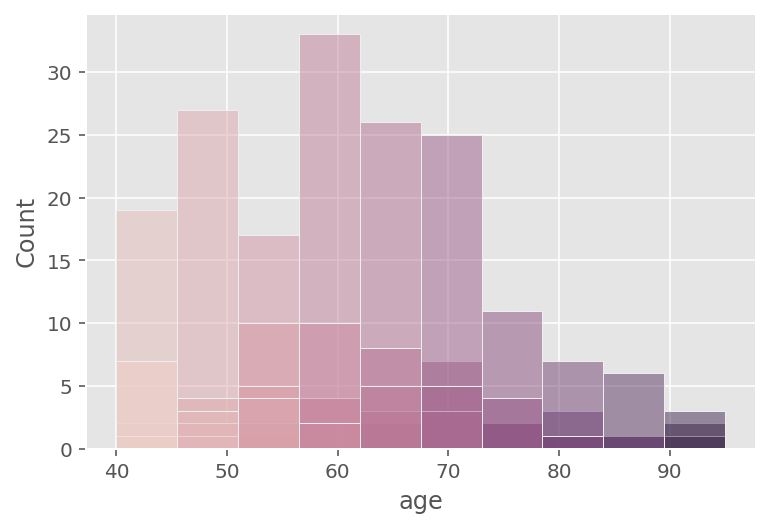

In [7]:
sns.histplot(med_data, x= "age",hue="age", legend = False, color = "darkred")


###### Peak age range to get heart diease is about 60 years old .

In [13]:
x_data =[med_data["age"].values]
x_labels = ['age'] 

fig = ff.create_distplot(x_data, x_labels,show_rug=False)
fig.update_layout(title_text='Age Distribution plot')
fig.update_traces(marker_color="blue")
 
fig.show()

Here is a clearer picture. <br>45, 50, 60, 65, 70 years old seems like high risk ages 
>How about Gender and Age?

In [14]:
colors = ['moccasin', 'deepskyblue'] 
labels = ['Male','Female']
fig = px.box(med_data, x= "sex", y="age", points="all",color = "sex",color_discrete_sequence=colors )
fig.update_layout(title_text="Female (0) vs Male (1)", plot_bgcolor = 'black', showlegend =  False) 

fig.show()

In [15]:
fig = px.violin(med_data, y="age", x="smoking", color="DEATH_EVENT", box=True, points="all", hover_data=med_data.columns)
fig.update_layout(title_text="Survival Rate for Age and Smoking",plot_bgcolor = 'lightgrey')
fig.show()

Survival rate for smoker and non-smoker heart failure person age between 50 to 65 is high.
Surprisely, non-smoking fatalities are higher compared to smoking heart failure person (203 vs 96, about double)

In [16]:
label1 = ['Non-Smokers','Smokers']
sm_yes = med_data[med_data['smoking']==1]
sm_no = med_data[med_data['smoking']==0]
value1 = [len(sm_no), len(sm_yes)]

label2 = ['No Diabetes','Diabetes']
d_yes = med_data[med_data['diabetes']==1]
d_no = med_data[med_data['diabetes']==0]
value2 = [len(d_no), len(d_yes)]

label3 = ['No HBP','HBP']
hbp_yes = med_data[med_data['high_blood_pressure']==1]
hbp_no = med_data[med_data['high_blood_pressure']==0]
value3 = [len(hbp_no), len(hbp_yes)]

label4 = ['No Anaemia','Anaemia']
amia_yes = med_data[med_data['anaemia']==1]
amia_no = med_data[med_data['anaemia']==0]
value4 = [len(amia_no), len(amia_yes)]



fig_all = go.Figure()
fig_all.add_trace(go.Bar(y=value1,x = label1,text = value1, name = "Smoking"))
fig_all.add_trace(go.Bar(y=value2,x = label2,text = value2, name = "Dibetes"))
fig_all.add_trace(go.Bar(y=value3,x = label3,text = value3, name = "HBP"))
fig_all.add_trace(go.Bar(y=value4,x = label4,text = value4, name = "Anaemia"))    
fig_all.update_layout(
    title_text="Various conditions vs heart failure",plot_bgcolor = 'white')
fig_all.show()

None of these conditions suggest they are related to Heart Failure since there are less patients with preconditions have heart failure.

In [20]:
color = ['maroon', 'purple']
label = [' Survived','Not Survived']
de_yes = med_data[med_data['DEATH_EVENT']==1]
de_no = med_data[med_data['DEATH_EVENT']==0]
value_de = [len(de_no), len(de_yes)]
fig1 = px.bar(y=value_de,x = label,text = value_de, color= label, color_discrete_sequence=color,)
fig1.update_layout(
    title_text="Survival rate",showlegend =  False,plot_bgcolor = 'white')

fig1.show()

In [21]:
value5= [med_data['creatinine_phosphokinase'].max()/100,med_data['creatinine_phosphokinase'].min()/100]
value6= [med_data['ejection_fraction'].max(),med_data['ejection_fraction'].min()]
value7= [med_data['serum_creatinine'].max(),med_data['serum_creatinine'].min()]
value8= [med_data['serum_sodium'].max(),med_data['serum_sodium'].min()]

fig_all = go.Figure()
#fig_all = go.Figure()
fig_all.add_trace(go.Box( y = value5, name = "CPK(x100 mcg/L)" ))
fig_all.add_trace(go.Box( y = [10/100, 120/100], name = "Normal CPK(x100 mcg/L)" ))
fig_all.add_trace(go.Box( y = value6,  name = "ef(%)" ))
fig_all.add_trace(go.Box( y = [50, 70], name = "Normal EF(%)" ))
fig_all.add_trace(go.Box( y = value7,  name = "serum_creatinine" ))
fig_all.add_trace(go.Box( y = [0.84, 1.21], name = "Normal S_Creat (mg per deciliter)" ))
fig_all.add_trace(go.Box( y = value8,  name = "serum_sodium" ))
fig_all.add_trace(go.Box( y = [135, 145], name = "Normal S_Sodium (mEq/L)" ))


fig_all.update_layout(
    title_text="Preconditions leading to heart failure",plot_bgcolor = 'black')
fig_all.show()


Normal CPK Levels: https://www.ucsfhealth.org/medical-tests/003503#:~:text=When%20the%20total%20CPK%20level,which%20tissue%20has%20been%20damaged.
<br>Normal EF Levels: https://www.heart.org/en/health-topics/heart-failure/diagnosing-heart-failure/ejection-fraction-heart-failure-measurement#:~:text=Ejection%20fraction%20(EF)%20is%20a,pushed%20out%20with%20each%20heartbeat.
<BR>Normal S_Creat Levels:  https://www.mayoclinic.org/tests-procedures/creatinine-test/about/pac-20384646
<BR>Normal S_Sodium Levels: https://www.mayoclinic.org/diseases-conditions/hyponatremia/symptoms-causes/syc-20373711#:~:text=A%20normal%20blood%20sodium%20level,Certain%20medications.

It looks like these Preconditions may lead to heart failure since the conditions are outside the normal range of healthy people.

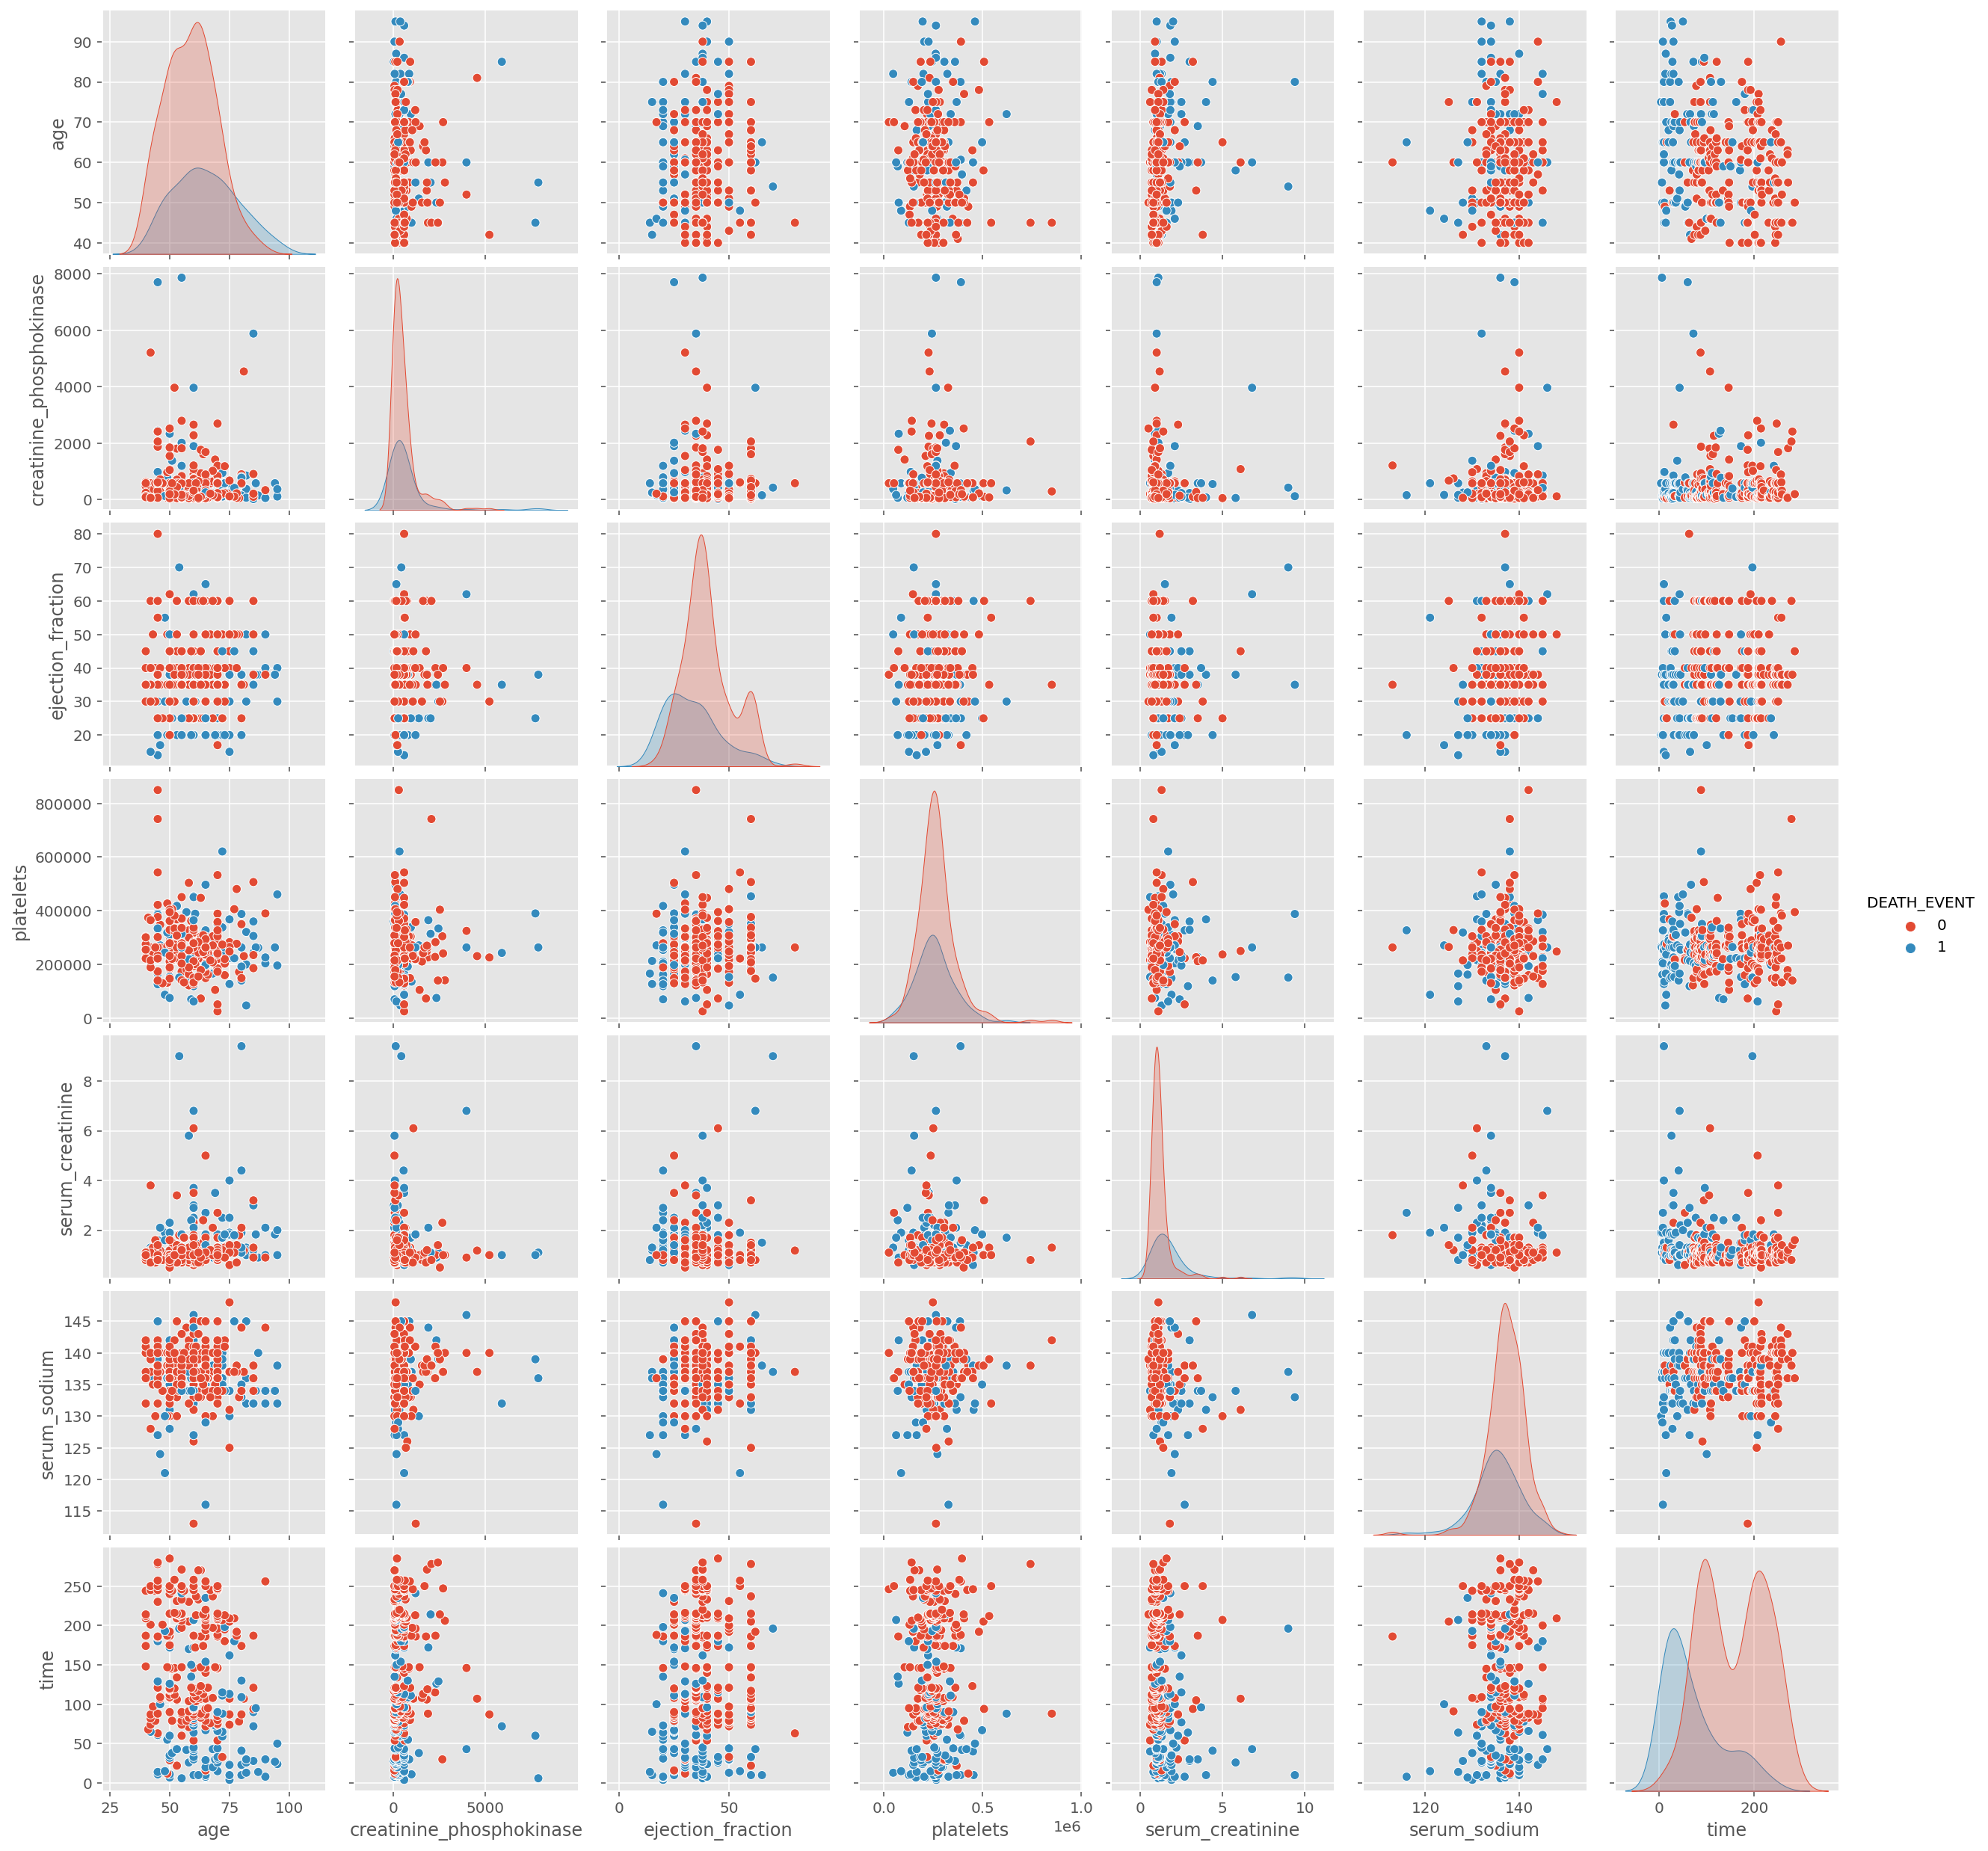

In [22]:
sns.pairplot(med_data[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','DEATH_EVENT']], hue='DEATH_EVENT')

Reviewing Pair plot for feature selection.

# Setup The Data Modeling


Feature selection: 1)time 2)serum_creatinine 3)ejection_fraction 4)age and 5)serum_sodium 

In [23]:
#feature selection and train / Test set up

x = med_data[['age','ejection_fraction','serum_creatinine','time','serum_sodium']] 
y = med_data["DEATH_EVENT"]
x_train, x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=7)


### APPLYING LOGISTIC REGRESSION MODEL

Logistic Regression Test ROC 79.97%
Logistic Regression CV mean score: 82.94% +- 5.01%
{'C': 0.001, 'penalty': 'l2'}
 LOG_R Best ROC_AUC Score 82.45%
 Best CV mean score: 82.93% +- 6.04%
 Best Precision Score: 78.16%
 Best Recall Score: 70.83%
 Best F1 Score: 74.32%


<Figure size 432x288 with 0 Axes>

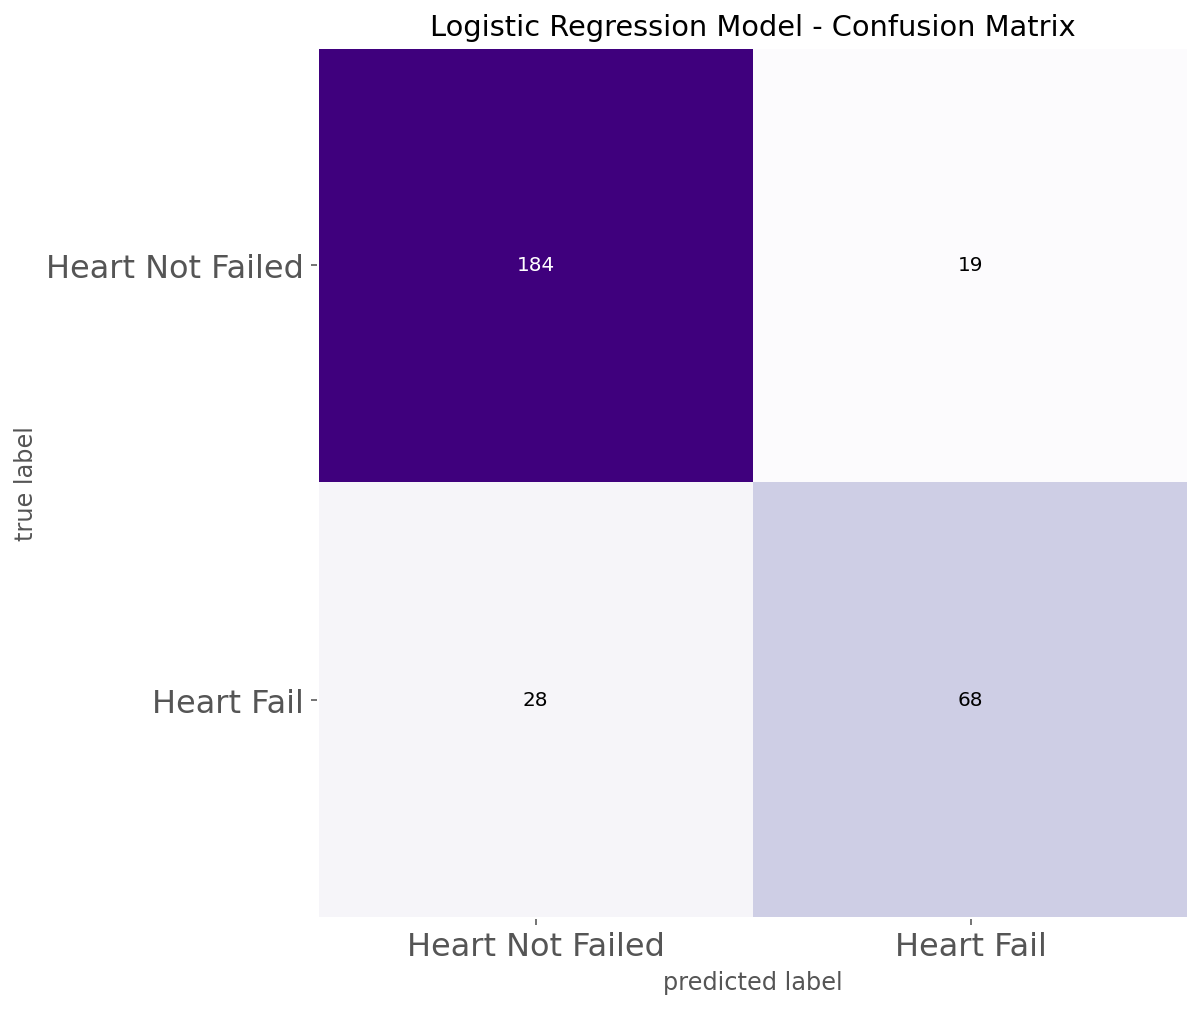

In [24]:
# Run Logistic Regression Model 

Log_R = LogisticRegression()   

Log_R.fit(x_train, y_train) #Fitting the model with Training dataset and scoring
Log_R_scoreTR= Log_R.score(x_train, y_train)

#Mesuring ROC and AUC scores based on predicted y and actual y test
Log_R_pred_TT = Log_R.predict(x_test)
Log_R_roc_TT = roc_auc_score(y_test, Log_R_pred_TT)
print("Logistic Regression Test ROC " + "{:.2f}%".format(100*Log_R_roc_TT))
    
# Applying K Fold Cross Validation to dataset     
kf = KFold(n_splits=5, shuffle=True, random_state = 88) # Set up CV
cv_Log_R = cross_val_score(Log_R, x, y,cv=kf) # Run CV LogisticRegression Model
print("Logistic Regression CV mean score: "+"{:.2f}%".format(100*np.mean(cv_Log_R)) +" +- "+"{:.2f}%".format(100*np.std(cv_Log_R)))

#Set up GridSearchCV for Tuning Params
param_grid = {"C":np.logspace(-3,3,20), "penalty":["l2"]}# l1 lasso l2 ridge

grid = GridSearchCV(LogisticRegression(), param_grid = param_grid,cv = 10)
grid_fit = grid.fit(x_train,y_train)
best_param = grid.best_params_
print(best_param)
pred = grid.predict(x_test)
grid_score=roc_auc_score(y_test,pred)
print(" LOG_R Best ROC_AUC Score " + "{:.2f}%".format(100*grid_score))

#use best params to train and test
Log_R_best = LogisticRegression(C=best_param['C'], penalty = best_param['penalty'])
Log_R_best.fit(x_train, y_train)
Log_R_best_pred=Log_R_best.predict(x_test)

#Cross validating the Best Model
CV_best_score= cross_val_score(grid, x, y,cv=kf)
print(" Best CV mean score: "
          +"{:.2f}%".format(100*np.mean(CV_best_score)) 
          +" +- "+"{:.2f}%".format(100*np.std(CV_best_score)))

#use best params to predict y
Log_R_pred = Log_R_best.predict(x)
print(" Best Precision Score: "  + "{:.2f}%".format(100*precision_score(y,Log_R_pred)))
print(" Best Recall Score: "  + "{:.2f}%".format(100*recall_score(y,Log_R_pred)))
print(" Best F1 Score: "  + "{:.2f}%".format(100*f1_score(y,Log_R_pred)))

#Plot Confusion Matrix 
Log_R_cm = confusion_matrix(y, Log_R_pred)
plt.figure()
plot_confusion_matrix(Log_R_cm, figsize=(12,8), hide_ticks=True, cmap='Purples')
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()


### APPLYING SVM MODEL

Init SVM ROC_AUC Score: 84.63%
SVM CV mean score: 83.63% +- 6.99%
SVM Best ROC_AUC Score: 82.45%
 Best CV mean score: 84.30% +- 6.77%
 Best Precision Score: 82.93%
 Best Recall Score: 70.83%
 Best F1 Score: 76.40%


<Figure size 432x288 with 0 Axes>

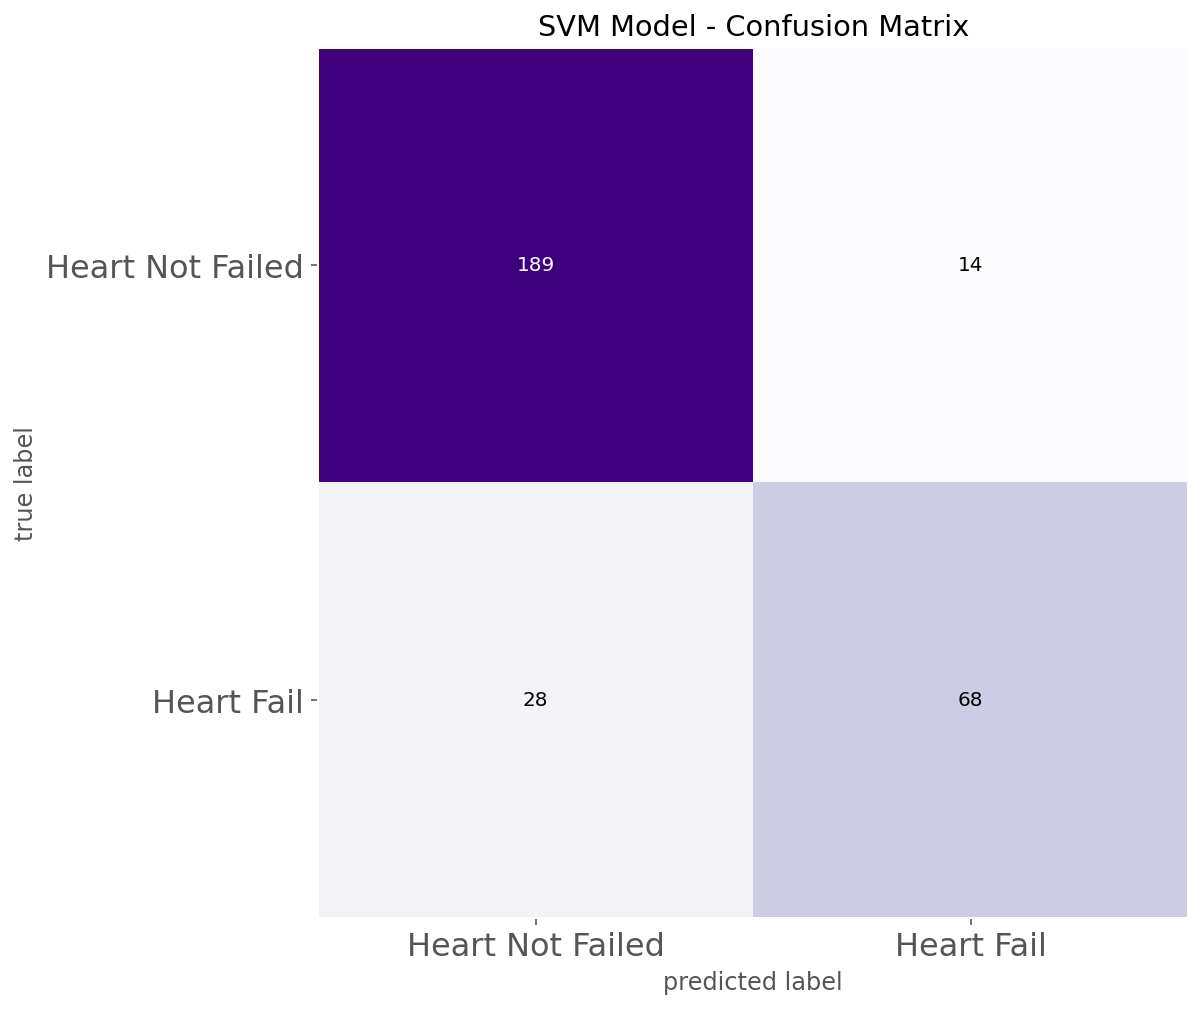

In [25]:
# Run SVM Model on each model object
sv_c = SVC()

    
##Fitting the model with Training dataset and scoring
sv_c.fit(x_train, y_train)
sv_c_pred_TT=sv_c.predict(x_test)
sv_c_score_TT=roc_auc_score(y_test,sv_c_pred_TT)
print("Init SVM ROC_AUC Score: " + "{:.2f}%".format(100*sv_c_score_TT))

# Applying K Fold Cross Validation to dataset  
kf = KFold(n_splits=5, shuffle=True, random_state = 88) # Set up CV
cv_sv_c = cross_val_score(sv_c, x, y,cv=kf) # Run CV LogisticRegression Model
print("SVM CV mean score: "+"{:.2f}%".format(100*np.mean(cv_sv_c)) +" +- "+"{:.2f}%".format(100*np.std(cv_sv_c)))
    
#Tuning the Model
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid_fit = grid.fit(x_train,y_train)
best_param = grid.best_params_
pred = grid.predict(x_test)
grid_score=roc_auc_score(y_test,pred)
print("SVM Best ROC_AUC Score: " + "{:.2f}%".format(100*grid_score))
    
sv_c_best = SVC(C=best_param['C'], gamma = best_param['gamma'], kernel = best_param['kernel'])
sv_c_best.fit(x_train, y_train)
sv_c_best_pred=sv_c_best.predict(x_test)

#Cross validating the Best Model
CV_best_score= cross_val_score(grid, x, y,cv=kf)
print(" Best CV mean score: "
          +"{:.2f}%".format(100*np.mean(CV_best_score)) 
          +" +- "+"{:.2f}%".format(100*np.std(CV_best_score)))

#use best params to predict y and print results
sv_c_best_pred = sv_c_best.predict(x)
print(" Best Precision Score: "  + "{:.2f}%".format(100*precision_score(y,sv_c_best_pred)))
print(" Best Recall Score: "  + "{:.2f}%".format(100*recall_score(y,sv_c_best_pred)))
print(" Best F1 Score: "  + "{:.2f}%".format(100*f1_score(y,sv_c_best_pred)))

#Plot Confusion Matrix 
sv_c_cm = confusion_matrix(y, sv_c_best_pred)
plt.figure()
plot_confusion_matrix(sv_c_cm, figsize=(12,8), hide_ticks=True, cmap='Purples')
plt.title("SVM Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()
    
   

### APPLYING KNN MODEL

Init KNN Test roc_auc Score: 83.54%
KNN CV mean score: 83.28% +- 6.91%
Best K:58
Best mean score: 81.90% +- 0.14%
KNN Test Score: 77.48%
KNN Best CV mean score: 82.63% +- 7.31%
Best Precision Score: 86.57%
Best Recall Score: 60.42%
Best F1 Score: 71.17%


<Figure size 432x288 with 0 Axes>

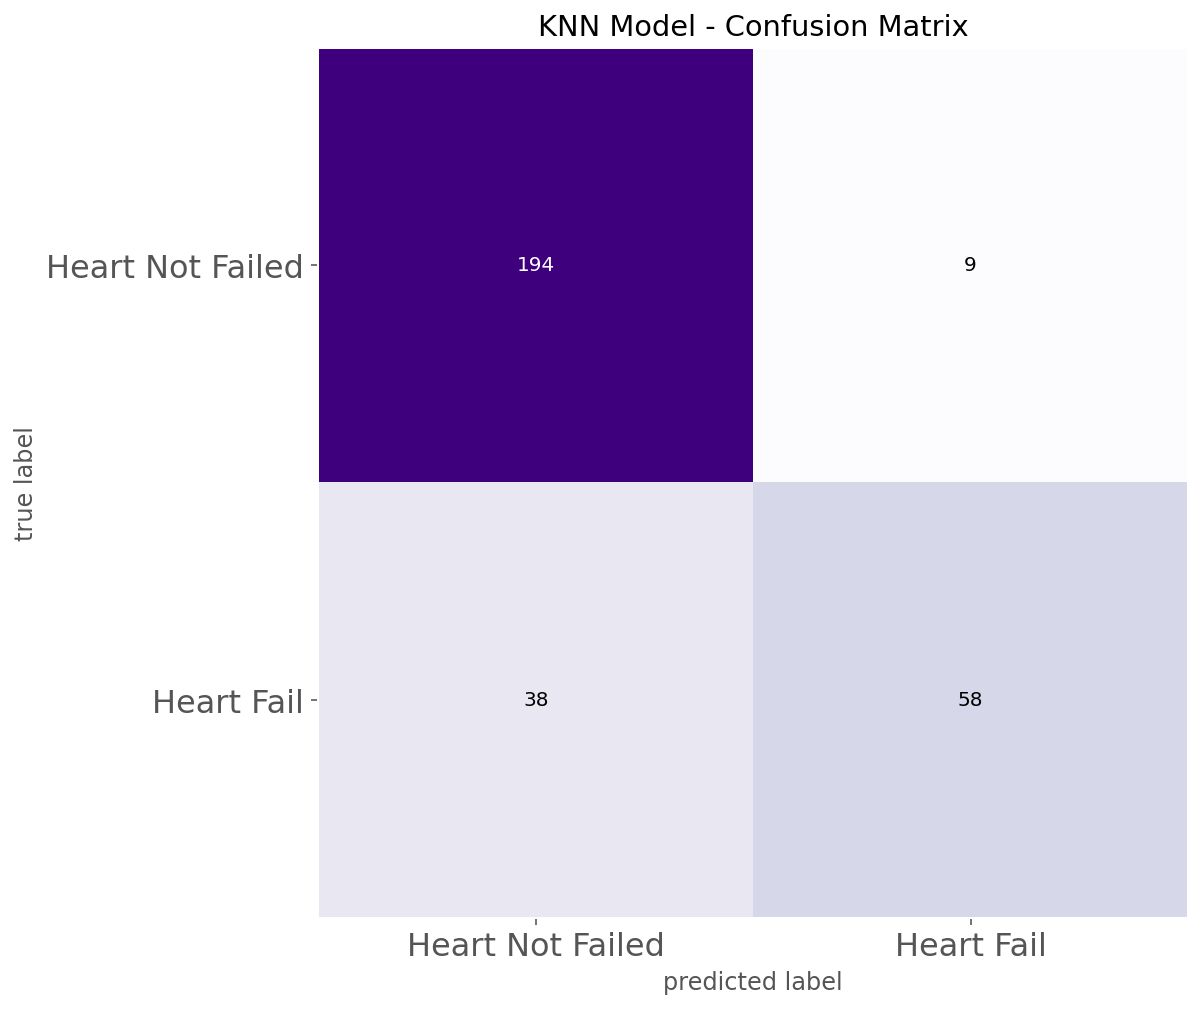

In [26]:
# Run KNN Model on each model object

knn = KNeighborsClassifier(n_neighbors=5)
    
##Fitting the model with Training dataset 
knn.fit(x_train, y_train)
       
#Predicting y and Scoring
y_knn_pred = knn.predict(x_test)
knn_score_TT=roc_auc_score(y_test,y_knn_pred)
print("Init KNN Test roc_auc Score: " + "{:.2f}%".format(100*knn_score_TT))

#Cross validating the Model
kf = KFold(n_splits=5, shuffle=True, random_state = 88) # Set up CV
cv_knn = cross_val_score(knn, x, y,cv=kf) # Run CV LogisticRegression Model
print("KNN CV mean score: "+"{:.2f}%".format(100*np.mean(cv_knn)) +" +- "+"{:.2f}%".format(100*np.std(cv_knn)))
    
#set up and tune Model for best results
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
grid = GridSearchCV(knn, param_grid, cv=10)
grid.fit(x, y)
best_k = grid.cv_results_['rank_test_score'][0]
print ("Best K:" + str(best_k) )
print("Best mean score: "+"{:.2f}%".format(100*grid.cv_results_['mean_test_score'][best_k]) 
          +" +- "+"{:.2f}%".format(grid.cv_results_['std_test_score'][best_k]))
    
#Using best params to train and test

knn_best = KNeighborsClassifier(n_neighbors=58)
knn_best.fit(x_train, y_train)
knn_best_pred = knn_best.predict(x_test)
knn_best_score_TT=roc_auc_score(y_test,knn_best_pred)

#Print best scores
print("KNN Test Score: " + "{:.2f}%".format(100*knn_best_score_TT))
cv_knn_best_score= cross_val_score(knn_best, x, y,cv=kf)
    
print("KNN Best CV mean score: "
          +"{:.2f}%".format(100*np.mean(cv_knn_best_score)) 
          +" +- "+"{:.2f}%".format(100*np.std(cv_knn_best_score)))

#use best params to predict y and print results
knn_best_pred = knn_best.predict(x) 
print("Best Precision Score: "  + "{:.2f}%".format(100*precision_score(y,knn_best_pred)))
print("Best Recall Score: "  + "{:.2f}%".format(100*recall_score(y,knn_best_pred)))
print("Best F1 Score: "  + "{:.2f}%".format(100*f1_score(y,knn_best_pred)))

#Plot Confusion Matrix 
knn_cm = confusion_matrix(y, knn_best_pred)
plt.figure()
plot_confusion_matrix(knn_cm, figsize=(12,8), hide_ticks=True, cmap='Purples')
plt.title("KNN Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()
    
   

### APPLYING RandomForestClassifier

Init RF roc_auc Score: 88.20%
RF CV mean score: 82.62% +- 2.45%
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 15}
Best RF roc_auc Score: 84.63%
RF Best CV mean Score: 83.97% +- 5.70%
Best Precision Score: 94.19%
Best Recall Score: 84.38%
Best F1 Score: 89.01%


<Figure size 432x288 with 0 Axes>

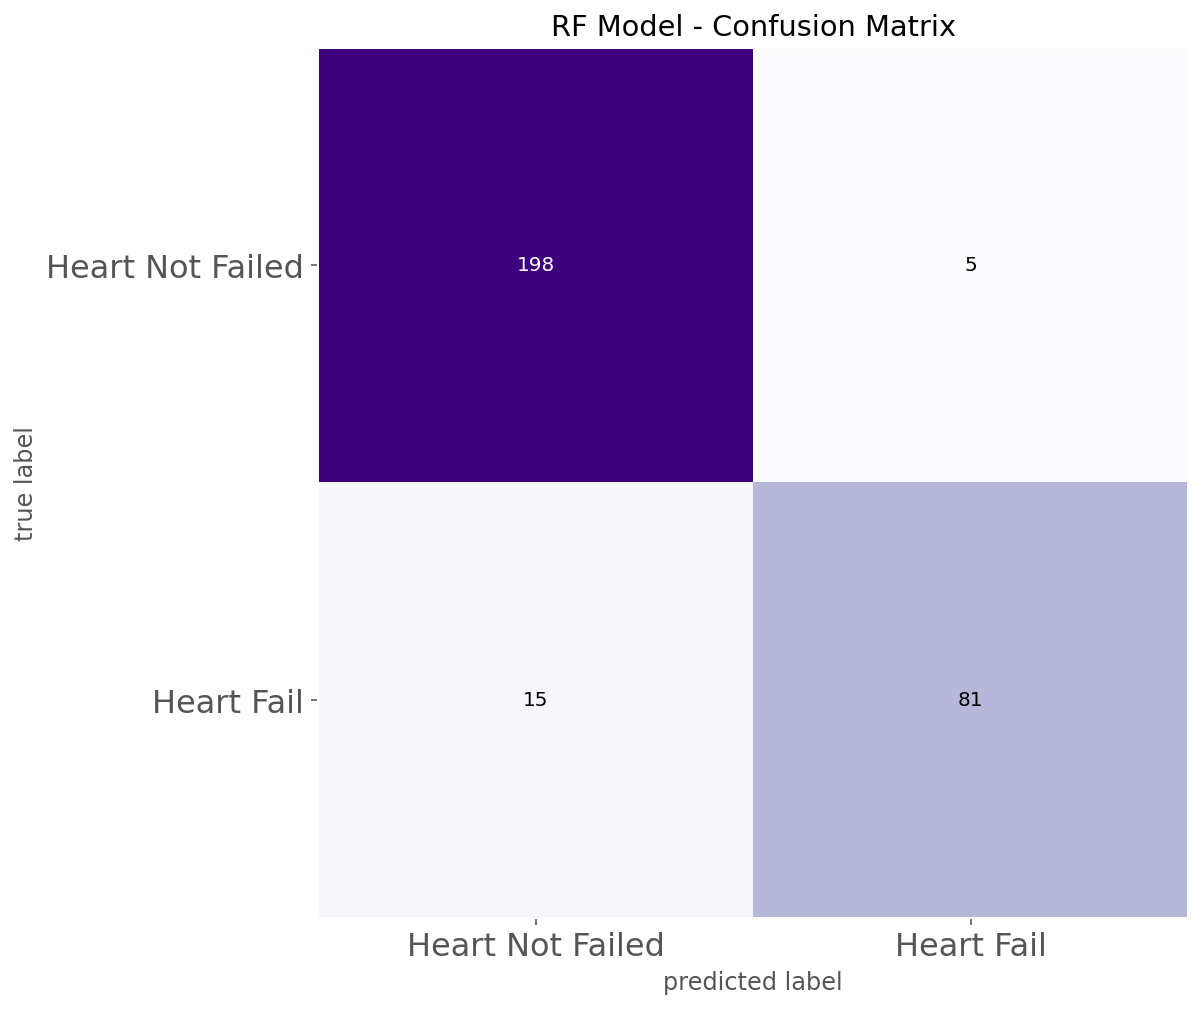

In [27]:
# Run RandomForestClassifier Model on each model object

rf = RandomForestClassifier(n_estimators=100)

##Fitting the model with Training dataset
rf.fit(x_train, y_train)
rf_pred_TT = rf.predict(x_test)
rf_score_TR = roc_auc_score(y_test, rf_pred_TT)
print("Init RF roc_auc Score: "  + "{:.2f}%".format(100*rf_score_TR))

kf = KFold(n_splits=5, shuffle=True, random_state = 88) # Set up CV

cv_rf = cross_val_score(rf, x, y,cv=kf) # Run CV LogisticRegression Model
    
print("RF CV mean score: "+"{:.2f}%".format(100*np.mean(cv_rf)) +" +- "+"{:.2f}%".format(100*np.std(cv_rf)))
    

#Tuning the parameters to get results
param_grid = { 
    'n_estimators': [10, 15,20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
grid_rf.fit(x_train, y_train)


#Print best Params
best_param = grid_rf.best_params_
print(best_param)

#using best parameters to run the model

rf_best= RandomForestClassifier(
        n_estimators = best_param['n_estimators'],
        max_features = best_param['max_features'],
        max_depth = best_param['max_depth'],
        criterion = best_param['criterion'])
    
rf_best.fit(x_train, y_train)    
rf_best_pred = rf_best.predict(x_test)
rf_best_pred_score = roc_auc_score(y_test, rf_best_pred)

print("Best RF roc_auc Score: "  + "{:.2f}%".format(100*rf_best_pred_score))
    
#print best CV Scores
cv_best_score= cross_val_score(rf_best, x, y,cv=kf)

print("RF Best CV mean Score: "
          +"{:.2f}%".format(100*np.mean(cv_best_score)) 
          +" +- "+"{:.2f}%".format(100*np.std(cv_best_score)))

#use best params to predict y and print results
rf_pred = rf_best.predict(x)
#Print results
print("Best Precision Score: "  + "{:.2f}%".format(100*precision_score(y,rf_pred)))
print("Best Recall Score: "  + "{:.2f}%".format(100*recall_score(y,rf_pred)))
print("Best F1 Score: "  + "{:.2f}%".format(100*f1_score(y,rf_pred)))

#Plot Confusion Matrix 
rf_cm = confusion_matrix(y, rf_pred)
plt.figure()
plot_confusion_matrix(rf_cm, figsize=(12,8), hide_ticks=True, cmap='Purples')
plt.title("RF Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()
    
   

In [28]:
### APPLYING XGB

Init xgb roc_auc Score: 83.54%
xgb CV mean score: 82.63% +- 6.07%
Best Precision Score: 86.05%
Best Recall Score: 77.08%
Best F1 Score: 81.32%


<Figure size 432x288 with 0 Axes>

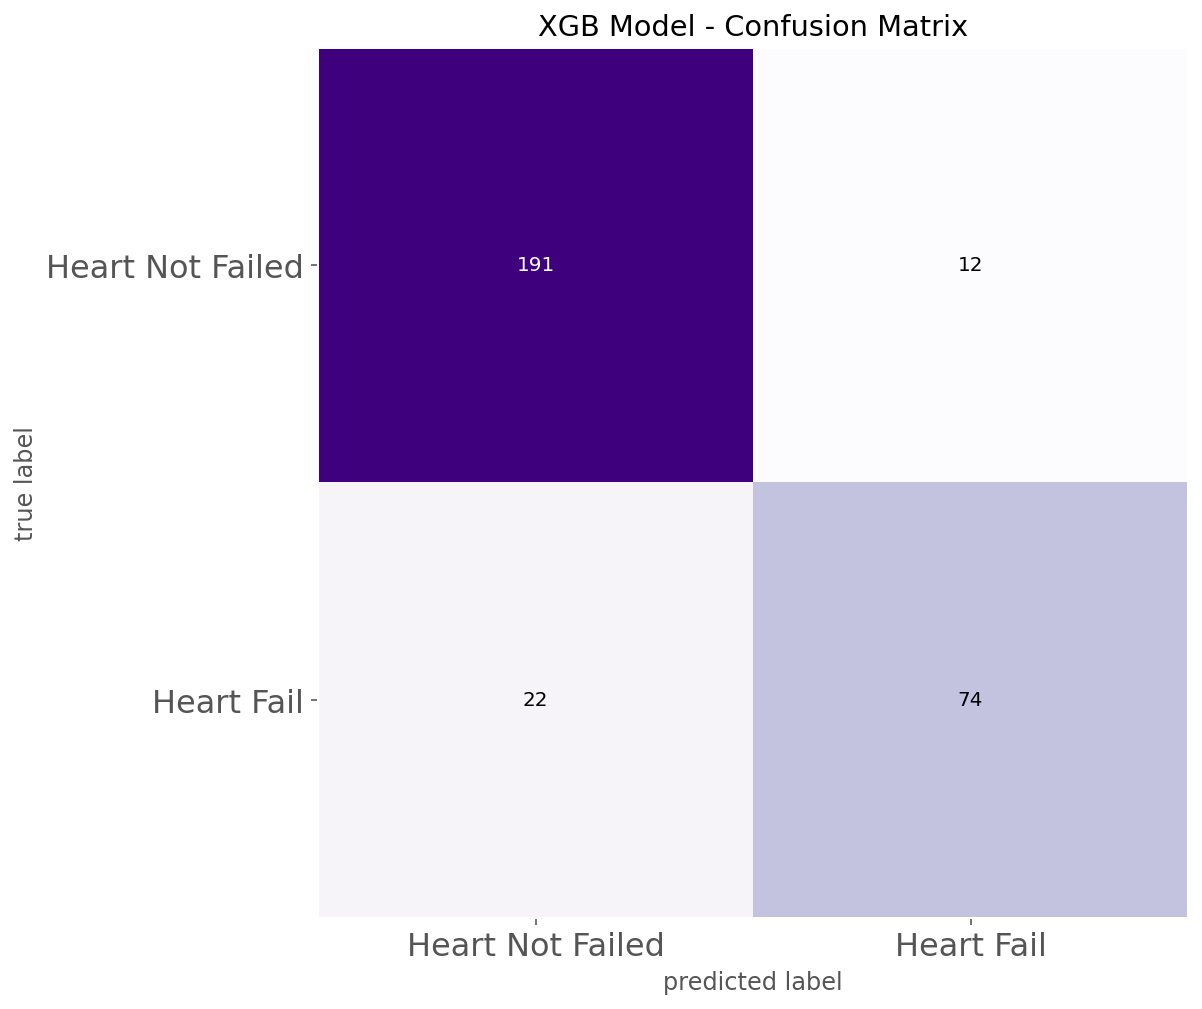

In [29]:
# xgbrf classifier

xgb = xgboost.XGBRFClassifier(max_depth=3, random_state=0)

##Fitting the model with Training dataset
xgb.fit(x_train, y_train)
xgb_pred_TT = xgb.predict(x_test)
xgb_score_TR = roc_auc_score(y_test, xgb_pred_TT)
print("Init xgb roc_auc Score: "  + "{:.2f}%".format(100*xgb_score_TR))

kf = KFold(n_splits=5, shuffle=True, random_state = 88) # Set up CV
cv_xgb = cross_val_score(xgb, x, y,cv=kf) # Run CV LogisticRegression Model
print("xgb CV mean score: "+"{:.2f}%".format(100*np.mean(cv_xgb)) +" +- "+"{:.2f}%".format(100*np.std(cv_xgb)))

xgb_pred = xgb.predict(x)
print("Best Precision Score: "  + "{:.2f}%".format(100*precision_score(y,xgb_pred)))
print("Best Recall Score: "  + "{:.2f}%".format(100*recall_score(y,xgb_pred)))
print("Best F1 Score: "  + "{:.2f}%".format(100*f1_score(y,xgb_pred)))

xgb_cm = confusion_matrix(y, xgb_pred)
      
plt.figure()
plot_confusion_matrix(xgb_cm, figsize=(12,8), hide_ticks=True, cmap='Purples')
plt.title("XGB Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()


In [30]:
### APPLYING XGB (TUNED)

best XGB roc_auc Score 89.29%
xgb CV mean score: 82.63% +- 6.07%
 Best Precision Score 89.53%
 Best Recall Score 80.21%


<Figure size 432x288 with 0 Axes>

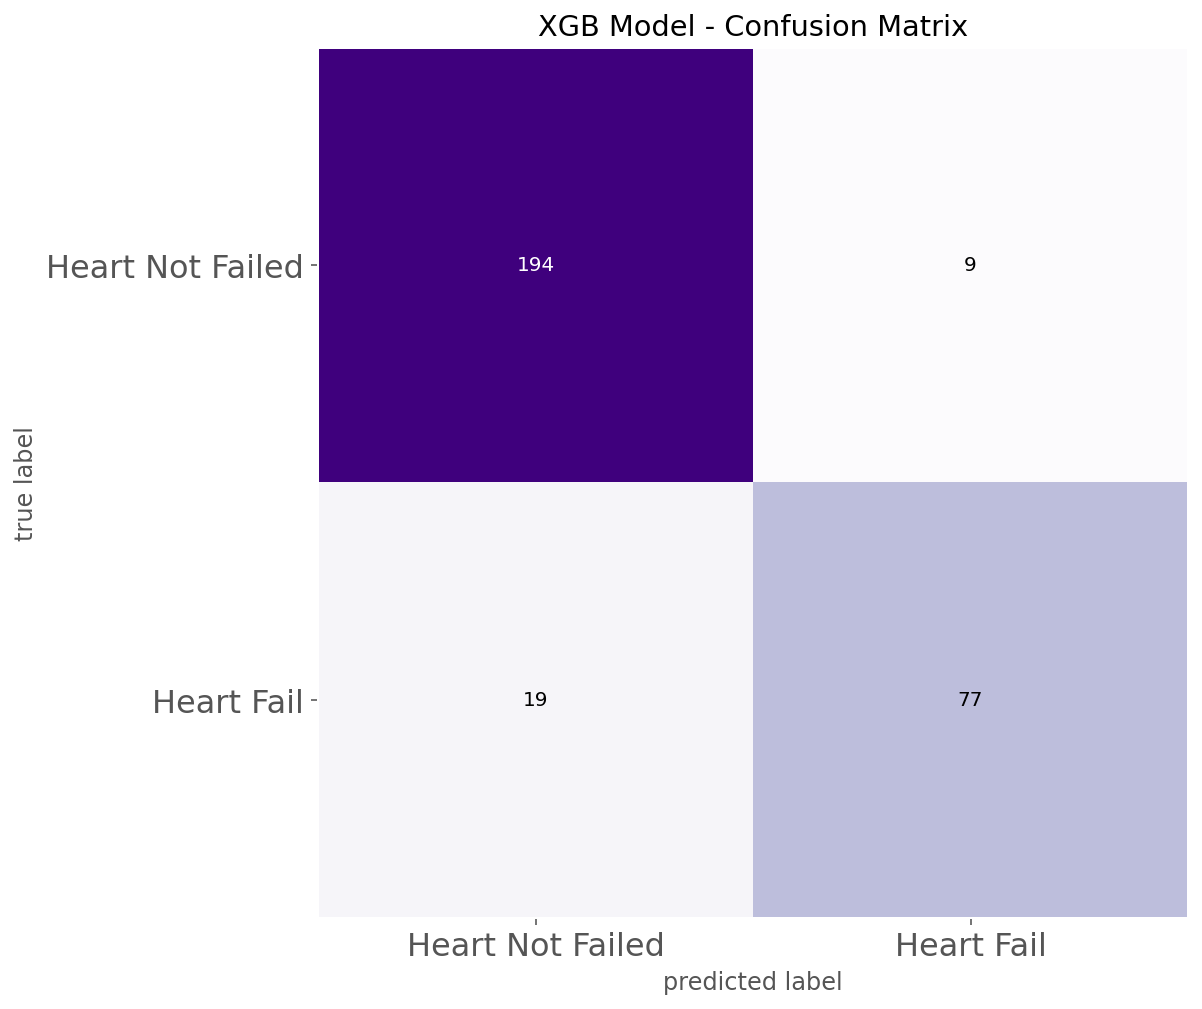

In [31]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'gamma': [1],
              'learning_rate': [0.9], #so called `eta` value
              'max_depth': [4],
              'min_child_weight': [2.2],
              'subsample': [0.9],
              'colsample_bytree': [0.61],
              'n_estimators': [26], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]
                     }

skf = StratifiedKFold(n_splits=10, shuffle = True)

grid_xgb = GridSearchCV(xgb, parameters, n_jobs=5, 
                        cv = skf.split(x_train, y_train))

grid_xgb.fit(x_train, y_train)
grid_xgb_pred_TT = grid_xgb.predict(x_test)

grid_xgb_score_TT = roc_auc_score(y_test, grid_xgb_pred_TT)
print("best XGB roc_auc Score "  + "{:.2f}%".format(100*grid_xgb_score_TT))
cv_grid__xgb = cross_val_score(xgb, x, y,cv=kf) # Run CV LogisticRegression Model
print("xgb CV mean score: "+"{:.2f}%".format(100*np.mean(cv_grid__xgb)) +" +- "+"{:.2f}%".format(100*np.std(cv_grid__xgb)))


xgb_best_pred = grid_xgb.predict(x)

print(" Best Precision Score "  + "{:.2f}%".format(100*precision_score(y,xgb_best_pred)))
print(" Best Recall Score "  + "{:.2f}%".format(100*recall_score(y,xgb_best_pred)))

xgb_cm = confusion_matrix(y, xgb_best_pred)
      
plt.figure()
plot_confusion_matrix(xgb_cm, figsize=(12,8), hide_ticks=True, cmap='Purples')
plt.title("XGB Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()







### Plot ROC_AUC compare plot

In [32]:
# Roc_auc compare
fig = go.Figure()
fig.add_shape(type='line', line=dict(dash='dash'),x0=0, x1=1, y0=0, y1=1)

y_score = rf_best.predict_proba(x)[:,1]

fpr, tpr, thresholds = roc_curve(y, y_score)

name = f"{'RFC'} (AUC={auc(fpr, tpr):.2f})"
fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

y_score4 = grid_xgb.predict_proba(x)[:,1]
fpr, tpr, thresholds = roc_curve(y, y_score4)

name = f"{'XGB (Tuned)'} (AUC={auc(fpr, tpr):.2f})"
fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))


y_score5 = xgb.predict_proba(x)[:,1]
fpr, tpr, thresholds = roc_curve(y, y_score5)

name = f"{'XGB'} (AUC={auc(fpr, tpr):.2f})"
fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))


y_score3 = Log_R.predict_proba(x)[:,1]
fpr, tpr, thresholds = roc_curve(y, y_score3)

name = f"{'Log_R'} (AUC={auc(fpr, tpr):.2f})"
fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))



y_score1 = knn_best.predict_proba(x)[:,1]
fpr, tpr, thresholds = roc_curve(y, y_score1)

name = f"{'KNN'} (AUC={auc(fpr, tpr):.2f})"
fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))



y_score2 = sv_c_best.predict(x)
fpr, tpr, thresholds = roc_curve(y, y_score2)

name = f"{'sv_c'} (AUC={auc(fpr, tpr):.2f})"
fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

fig.update_layout(
    yaxis_title='True Positive Rate',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=500
)
fig.show()

### Plot Precision Recall compare plot

In [33]:
# Precision Recall compare
fig = go.Figure()
fig.add_shape(type='line', line=dict(dash='dash'),x0=0, x1=1, y0=1, y1=0)

y_score = rf_best.predict_proba(x)[:,1]
precision, recall, _ = precision_recall_curve(y, y_score)
auc_score = average_precision_score(y, y_score)
name = f"{'RF'} (Avg Pre={auc_score:.4f})"
fig.add_trace(go.Scatter(x=recall, y=precision, name=name, mode='lines'))

y_score5 = xgb.predict_proba(x)[:,1]
precision, recall, _ = precision_recall_curve(y, y_score5)
auc_score = average_precision_score(y, y_score5)
name = f"{'XGB'} (Avg Pre={auc_score:.4f})"
fig.add_trace(go.Scatter(x=recall, y=precision, name=name, mode='lines'))

y_score4 = grid_xgb.predict_proba(x)[:,1]
precision, recall, _ = precision_recall_curve(y, y_score4)
auc_score = average_precision_score(y, y_score4)
name = f"{'XGB (Tuned)'}'(Avg Pre={auc_score:.4f})"
fig.add_trace(go.Scatter(x=recall, y=precision, name=name, mode='lines'))

y_score3 = Log_R.predict_proba(x)[:,1]
precision, recall, _ = precision_recall_curve(y, y_score3)
auc_score = average_precision_score(y, y_score3)
name = f"{'LOG_R'} (Avg Pre={auc_score:.4f})"
fig.add_trace(go.Scatter(x=recall, y=precision, name=name, mode='lines'))

y_score1 = knn_best.predict_proba(x)[:,1]
precision, recall, _ = precision_recall_curve(y, y_score1)
auc_score = average_precision_score(y, y_score1)
name = f"{'KNN'} (Avg Pre={auc_score:.4f})"
fig.add_trace(go.Scatter(x=recall, y=precision, name=name, mode='lines'))

y_score2 = sv_c_best.predict(x)
precision, recall, _ = precision_recall_curve(y, y_score2)
auc_score = average_precision_score(y, y_score2)
name = f"{'SVM'} (Avg Pre={auc_score:.4f})"
fig.add_trace(go.Scatter(x=recall, y=precision, name=name, mode='lines'))

fig.update_layout(
    xaxis_title='Recall',
    yaxis_title='Precision',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=500)

fig.show()

### End